In [19]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils import find_peaks
from matplotlib.colors import LogNorm
from astropy.visualization import simple_norm
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

In [35]:
image_file = 'example_data/PAL5_3p6um.fits'
image_data = fits.getdata(image_file, ext=0)

mean, median, std = sigma_clipped_stats(image_data, sigma=10.)
threshold = median + (10. * std)
peak_table = find_peaks(image_data, threshold)
peak_table['peak_value'].info.format = '%.8g'
print(peak_table[:14])

x_peak y_peak peak_value
------ ------ ----------
  1269     28  0.3741385
  1140     30 0.35567144
  1302     30 0.68062896
   799     39 0.39198709
  1152     42  1.3132371
   598     43 0.52215636
   388     44   5.323173
   434     46  1.3173612
  1345     47  1.9439415
   655     50 0.63632089
  1134     51 0.76047921
  1290     53   4.984158
    90     58 0.46021923
   295     65  0.6671353


C:\Users\Jake\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


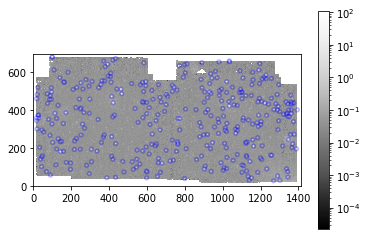

In [36]:
positions = np.transpose((peak_table['x_peak'], peak_table['y_peak']))
apertures = CircularAperture(positions, r=10.)
norm = LogNorm()
#norm = ImageNormalize(stretch=SqrtStretch())
#norm = simple_norm(image_data, 'sqrt', percent=99.9)
plt.imshow(image_data, cmap='Greys_r', origin='lower',
           norm=norm, interpolation='nearest')
plt.colorbar()
apertures.plot(color='blue', lw=1.5, alpha=0.3)
#plt.xlim(0, image_data[1]-1)
#plt.ylim(0, image_data[0]-1)

plt.savefig('local_peak_detection_test01.png', dpi=500)